In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import re

In [2]:
#Importa dados mundiais
arquivo = 'https://covid.ourworldindata.org/data/full_data.csv'
corona = pd.read_csv(arquivo, header=0)

In [3]:
#datahora
corona['date'] = pd.to_datetime(corona['date'])

In [4]:
#variavel semana
corona['week'] = corona.date.dt.weekofyear

#declara semana como index
corona.set_index('week', inplace=True)

In [5]:
#Isola as colunas dos países
b = corona[corona.location == 'Brazil']
i = corona[corona.location == 'Italy']
c = corona[corona.location == 'China']
e = corona[corona.location == 'United States']
g = corona[corona.location == 'Germany']
f = corona[corona.location == 'France']
es = corona[corona.location == 'Spain']

## 1. Total de casos por semana

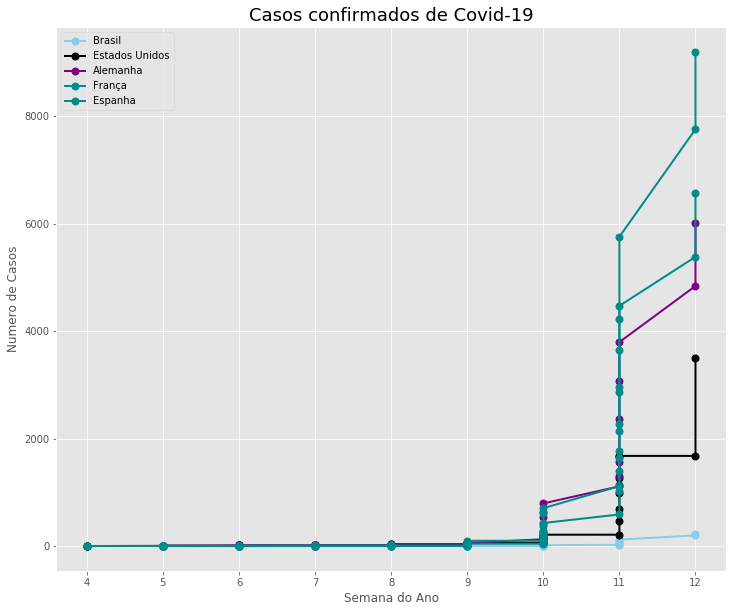

In [23]:

#Total de casos
b2 = pd.DataFrame(b.total_cases)
i2 = pd.DataFrame(i.total_cases)
c2 = pd.DataFrame(c.total_cases)
e2 = pd.DataFrame(e.total_cases)
g2 = pd.DataFrame(g.total_cases)
f2 = pd.DataFrame(f.total_cases)
es2 = pd.DataFrame(es.total_cases)



#Total de Casos
%matplotlib inline
plt.figure(figsize=(12,10))
plt.title('Casos confirmados de Covid-19', fontdict={'fontsize':18})
plt.plot(b2, data=b2, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
#plt.plot(i2, data=i2,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
#plt.plot(c2, data=c2,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e2, data=e2,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g2, data=g2,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f2, data=f2,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es2, data=es2,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="Espanha" )


plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Numero de Casos')
plt.legend()
plt.savefig('casossemana.png', format='png')

## 2. Total de mortes por semana

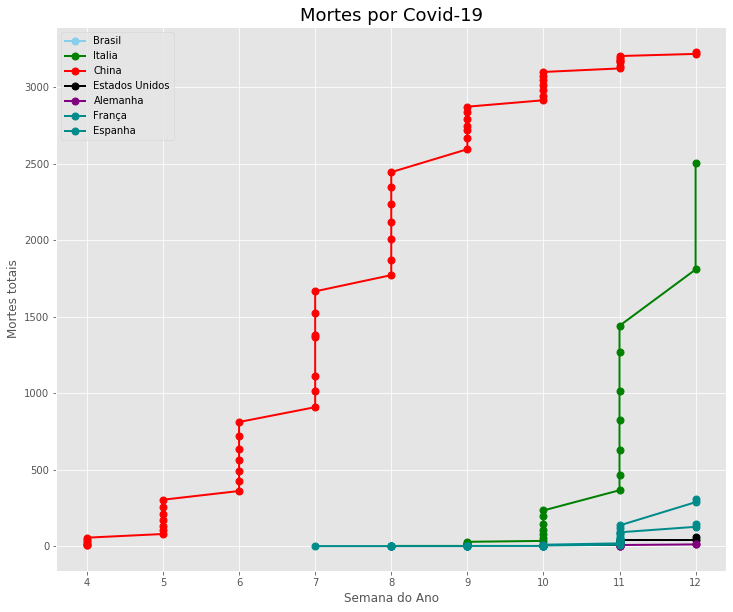

In [24]:
#Total de Mortes
b1 = pd.DataFrame(b.total_deaths)
i1 = pd.DataFrame(i.total_deaths)
c1 = pd.DataFrame(c.total_deaths)
e1 = pd.DataFrame(e.total_deaths)
g1 = pd.DataFrame(g.total_deaths)
f1 = pd.DataFrame(f.total_deaths)
es1 = pd.DataFrame(es.total_deaths)



#Total de Casos
%matplotlib inline
plt.figure(figsize=(12,10))
plt.title('Mortes por Covid-19', fontdict={'fontsize':18})
plt.plot(b1, data=b1, marker='.',  markersize=14, color='skyblue', linewidth=2, label="Brasil")
plt.plot(i1, data=i1,marker='.',  markersize=14, color='green', linewidth=2, label="Italia" )
plt.plot(c1, data=c1,marker='.',  markersize=14, color='red', linewidth=2, label="China" )
plt.plot(e1, data=e1,marker='.',  markersize=14, color='black', linewidth=2, label="Estados Unidos" )
plt.plot(g1, data=g1,marker='.',  markersize=14, color='purple', linewidth=2, label="Alemanha" )
plt.plot(f1, data=f1,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="França" )
plt.plot(es1, data=es1,marker='.',  markersize=14, color='darkcyan', linewidth=2, label="Espanha" )


plt.style.use('ggplot')
plt.xlabel('Semana do Ano')
plt.ylabel('Mortes totais')
plt.legend()
plt.savefig('Mortessemana.png', format='png')




# Corona Casos mundiais



In [8]:
#dataframe
mundo = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(mundo, header=0)
df['date'] = pd.to_datetime(df['date'])
df['week'] = df.date.dt.weekofyear
df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,week
0,2019-12-31,Afghanistan,0,0,0,0,1
1,2020-01-01,Afghanistan,0,0,0,0,1
2,2020-01-02,Afghanistan,0,0,0,0,1
3,2020-01-03,Afghanistan,0,0,0,0,1
4,2020-01-04,Afghanistan,0,0,0,0,1


## Brasil por dia

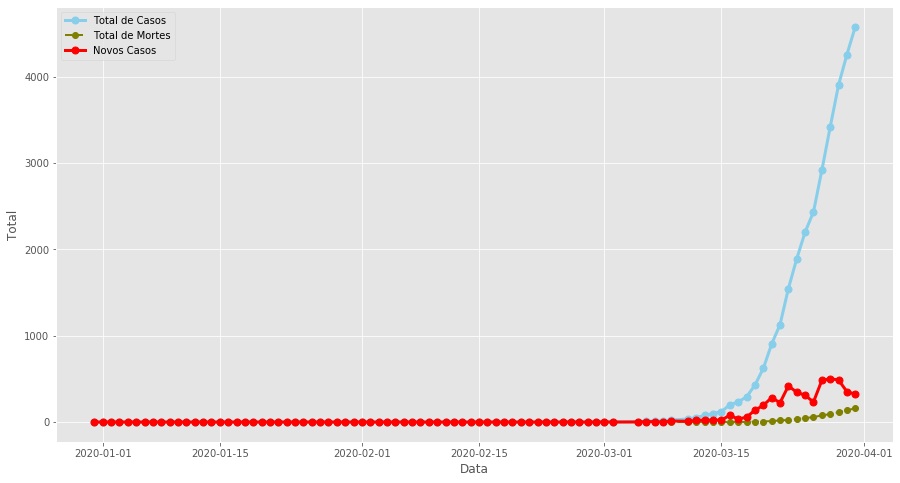

In [17]:
%matplotlib inline

br = df[df.location=='Brazil']
br.set_index('date', inplace=True)

plt.figure(figsize=(15,8))

tc = br.total_cases
td = br.total_deaths
nc = br.new_cases

plt.plot( tc, data=tc, marker='.', markerfacecolor='skyblue', markersize=14, color='skyblue', linewidth=3, label="Total de Casos")
plt.plot( td, data=td, marker='o', color='olive', linewidth=2, linestyle='dashed', label="Total de Mortes")
plt.plot( nc, data=nc, marker='.', markersize=14, color='red', linewidth=3, label="Novos Casos")

plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Total')
plt.legend()



### *Total de casos no mundo por dia*

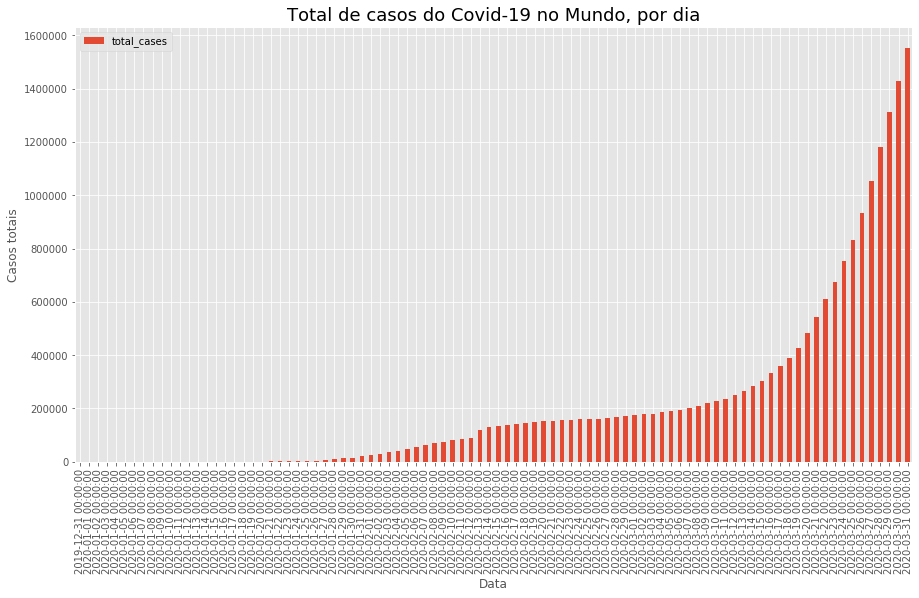

In [10]:
%matplotlib inline

plt.figure(figsize=(15,8))
df.groupby(df.date).total_cases.sum().plot.bar()
plt.title('Total de casos do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('CasosMundo.png', format='png')


### *Total de novos casos por dia*

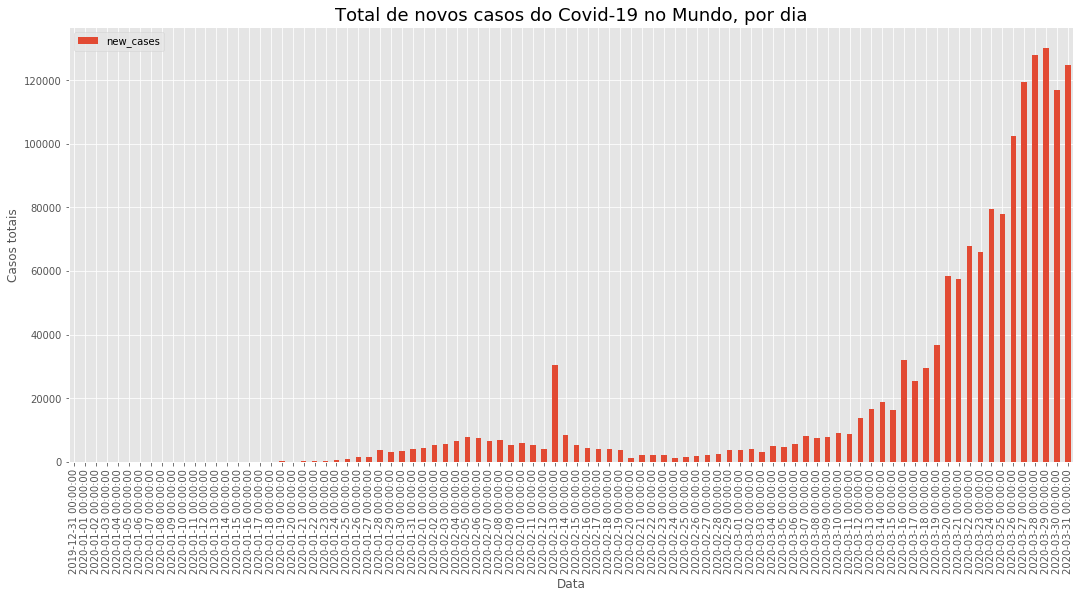

In [11]:
%matplotlib inline

plt.figure(figsize=(18,8))
df.groupby(df.date).new_cases.sum().plot.bar()
plt.title('Total de novos casos do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('novoscasosdia.png', format='png')

### *Total novas mortes por dia*

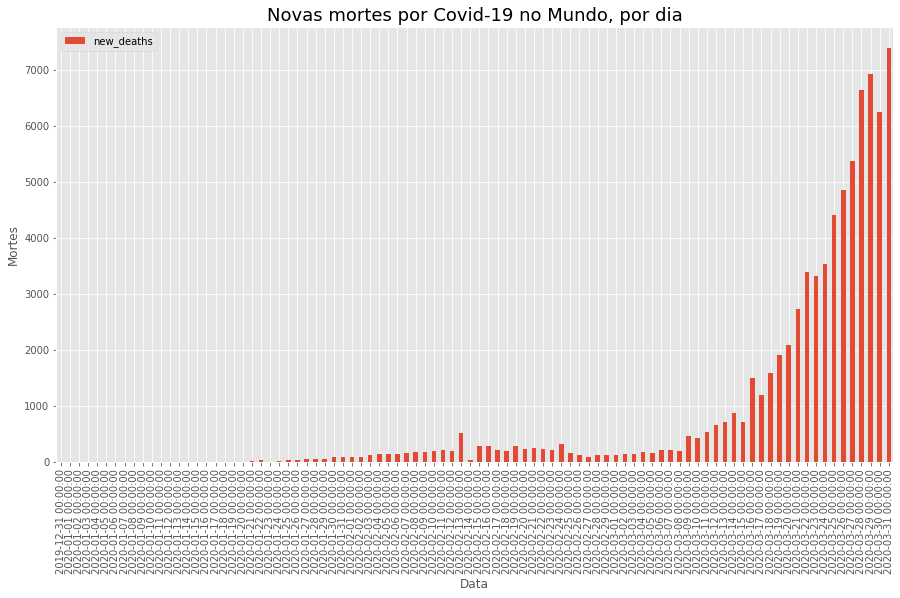

In [12]:
%matplotlib inline

plt.figure(figsize=(15,8))
df.groupby(df.date).new_deaths.sum().plot.bar()
plt.title('Novas mortes por Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Mortes')
plt.legend()
plt.savefig('novasmoretesdia.png', format='png')


### *Total de mortes no mundo por dia*

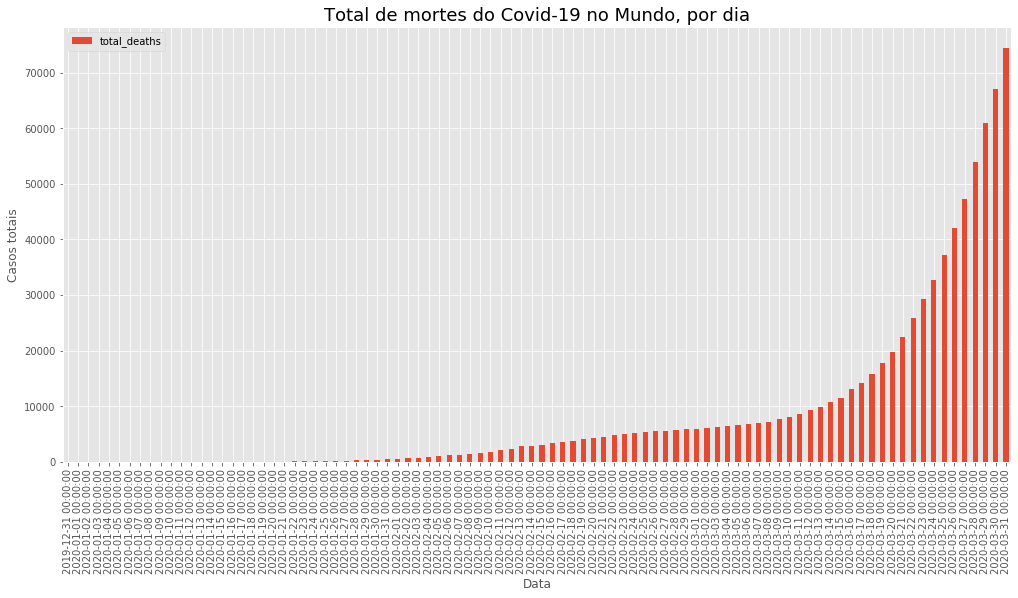

In [13]:
%matplotlib inline

plt.figure(figsize=(17,8))
df.groupby(df.date).total_deaths.sum().plot.bar()
plt.title('Total de mortes do Covid-19 no Mundo, por dia', fontdict={'fontsize':18})
plt.style.use('ggplot')
plt.xlabel('Data')
plt.ylabel('Casos totais')
plt.legend()
plt.savefig('totalmortesdia.png', format='png')